# Supervised Learning: Regression Modeling

In this week's workshop, we will learn about `supervised machine learning` wherein an annotated data having input-output pair is given to us to train machine learning model. The trained model then can be used to make predictions on `unsee` data (or test set). We aim to work on the following tasks:
- Ordinary linear regression model on one-dimensional feature/variable
- Ordinary linear regression model on multi-dimensional features/variables
- Ridge regression and hyper-parameter tuning

### Dataset Description

In the `data` directory, we are given `houses_portland.csv` file which contains columns for `area of a house`, `number of bedrooms in a house`, and `price`. The goal is to build model which can predict `price of a house` given `number of bedrooms` and `area`. First we will load dataset and find relationship between variables.

In [58]:
# Import the commonly-used modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# Load the dataset
data = pd.read_csv("data/houses_portland.csv")
print("data size: "+str(data.shape))
data.head()

data size: (47, 3)


,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Task 1: Ordinary linear regression model on one-dimensional feature/variable

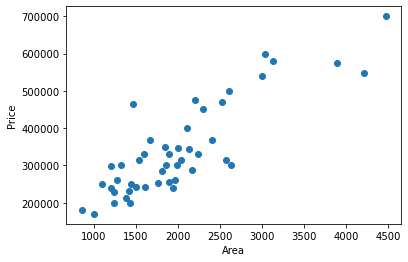

In [60]:
# Visually explore the relationship between "area" and "price"
X = data['area'].values
y = data['price'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

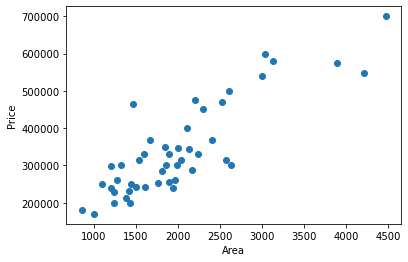

In [61]:
# Visually explore the relationship between "area" and "price"
X = data['area'].values
y = data['price'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Split data into `train` and `test` using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from sklearn library.

In [62]:
# Split data
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
X_train = np.reshape(X_train, (-1, 1))  # change from 1D array to 2D array
X_test = np.reshape(X_test, (-1, 1))
print("training data feature shape:", X_train.shape)
print("training data label shape:", y_train.shape)
print("test data feature space shape:", X_test.shape)
print("test data label shape:", y_test.shape)

training data feature shape: (37, 1)
training data label shape: (37,)
test data feature space shape: (10, 1)
test data label shape: (10,)


Looking at the shape of train and test sets, we can say that out of total 47 samples, 37 samples are in training and the remaining 10 samples are in test. Look at the documentation of `train_test_split` function to find out whether data is shuffled or not during the split operation.

### Model Development (or model training)

In [63]:
# Build linear regression model
from sklearn import linear_model as lm
ordinaryLRmodel = lm.LinearRegression()
ordinaryLRmodel.fit(X_train, y_train)

LinearRegression()

In [64]:
# Print the coefficients
print("coefficient:", ordinaryLRmodel.coef_)
print("intercept:", ordinaryLRmodel.intercept_)

coefficient: [141.709611]
intercept: 57834.31373823329


What is an Intercept? How you define coefficient?

### Plotting regression line

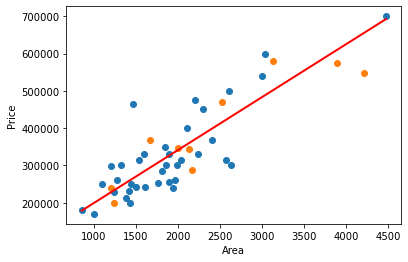

In [65]:
# Plot the model
x_line=[X.min(), X.max()]
y_line=[ordinaryLRmodel.intercept_+ordinaryLRmodel.coef_*X.min(), ordinaryLRmodel.intercept_+ordinaryLRmodel.coef_*X.max()]
plt.plot(x_line, y_line, 'r', lw=2)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Model Evaluation (on test set)

In [66]:
# Prediction/Testing
y_pred = ordinaryLRmodel.predict(X_test)
y_pred

array([232987.39293332, 228310.97577034, 364210.49271864, 502377.36344291,
       655140.32410012, 609084.70052536, 359959.20438866, 341253.53573676,
       415792.79112237, 293639.106441  ])

In [67]:
# Performance metrics
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))

Mean squared error: 3438688085.86
Coefficient of determination: 0.80


## Task 2: Ordinary linear regression model on multi-dimensional features/variables

In [68]:
# Data preparatoin
X = data[['area', 'bedroom']].values
y = data['price'].values
print(X.shape)
print(y.shape)

(47, 2)
(47,)


### Split data into training and testing sets

In [88]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37, 2)
(37, 1)
(10, 2)
(10, 1)


### Build linear regression model

In [70]:
model = lm.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Check model coefficients and comment

In [90]:
print("Intercept:", model.intercept_)
print("coefficients:", model.coef_)

Intercept: 57058.959116318496
coefficients: [ 124.54536553 8443.09198541]


### Do model predictions on test set

In [91]:
y_pred = model.predict(X_test)
y_pred

array([55007.35171616, 66371.20742445, 32561.61691142, 55181.60692572,
       66412.39501944, 66355.36604176, 43827.25604705, 66358.85114595,
       66362.49466397, 55029.3712381 ])

### Get model scores in terms of MSE and r^2 scores

In [93]:
# Write your code here
print("MSE Score:",mean_squared_error(y_test,y_pred))
print("R^2 Score:",r2_score(y_test,y_pred))

MSE Score: 3410671788.228258
R^2 Score: -6298449978.197527


## Task 3: Ridge regression and hyperparameter tuning

In [94]:
# Data preparatoin
X = data[['area', 'bedroom']].values
y = data['price'].values

# Data standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))

y = np.reshape(y, (-1, 1))  
ss.fit(y.astype(np.float))
y = ss.transform(y.astype(np.float))
print (X,y)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

### Split data into training and test sets

In [96]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = ms.train_test_split(X,y)
print("Training Data Feature:",X_train.shape)
print("Training Data Label:",y_train.shape)
print("Test Data Feature:",X_test.shape)
print("Test Data Shape:",y_test.shape)


Training Data Feature: (35, 2)
Training Data Label: (35, 1)
Test Data Feature: (12, 2)
Test Data Shape: (12, 1)


### Build linear regression model

In [98]:
model_1 = lm.LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

### Check model coefficients

In [99]:
print("Intercept:", model_1.intercept_)
print("coefficient:", model_1.coef_)

Intercept: [0.03610103]
coefficient: [[ 0.91748004 -0.06621384]]


### Do model predictions on test set

In [101]:
y_pred = model_1.predict(X_test)
y_pred

array([[ 0.050277  ],
       [-0.49353409],
       [ 2.25586274],
       [ 0.28367232],
       [-0.25823332],
       [-0.41184573],
       [-1.20146037],
       [-0.54021315],
       [-0.0551794 ],
       [-0.07809042],
       [-0.21038728],
       [ 0.79364108]])

### Get model scores in terms of MSE and r^2 scores

In [102]:
print("MSE Score:",mean_squared_error(y_test,y_pred))
print("R^2 Score:",r2_score(y_test,y_pred))

MSE Score: 0.20478541137303918
R^2 Score: 0.6944627450709602


### Model hyper-parameter tuning

When you check the documentation of `ridge regression` on sklearn API [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), you will find `alpha` as one of the parameter that is a `regularisation` term. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

Your task is to change `alpha` value and see its impact on model performance. Do you see any noticeable change in model performance with changing `alpha` value. Write your analysis in the cell provided. 

In [103]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
print(ridge.coef_,ridge.intercept_)

from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=[0.01, 0.5, 1, 3, 5, 7, 10, 20, 100]) 
ridge_cv.fit(X_train,y_train)
print("Alpha:",ridge_cv.alpha_ )

[[ 0.8764019  -0.03998973]] [0.03644557]
Alpha: 1.0


In [104]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    #ridge.fit(X_test1, y_test1)
    #coefs.append(ridge.coef_)
    
np.shape(coefs)

(0,)

### Write your summary below

In [105]:
T = [[-1, 1], [6, 2], [3, 3],[3, 4], [1, 3], [9, '?']]
T

[[-1, 1], [6, 2], [3, 3], [3, 4], [1, 3], [9, '?']]

In [106]:
len(T)

6

In [107]:
T = [[-1, 6, 3, 3, 1, 9],[1, 2, 3, 4, 4, '?']]

In [108]:
T

[[-1, 6, 3, 3, 1, 9], [1, 2, 3, 4, 4, '?']]

In [109]:
T[0]

[-1, 6, 3, 3, 1, 9]

In [110]:
T[1]

[1, 2, 3, 4, 4, '?']

In [111]:
def averageOfList(num):
    sumOfNumbers = 0
    for t in num:
        sumOfNumbers = sumOfNumbers + t

    avg = sumOfNumbers / len(num)
    return avg


print("The average of List is", averageOfList(T[1]))

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [112]:
T[1]

[1, 2, 3, 4, 4, '?']

In [113]:
print("The average of List is", averageOfList(T[1][:-1]))

The average of List is 2.8


In [114]:
import statistics as st

In [115]:
st.median(T[0])

3.0

In [116]:
st.mode(T[0])

3

In [117]:
st.mean(T[0])

3.5

In [118]:
st.mean(T[1][:-1])

2.8

In [119]:
from sklearn.preprocessing import normalize

X = [[1, -1, 2], [2, 0, 0], [0, 1, -1]]

In [120]:
l2_norm = normalize(X, norm='l2')
l2_norm

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [121]:
l1_norm = normalize(X, norm='l1')
l1_norm

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

In [122]:
l2_norm[0]

array([ 0.40824829, -0.40824829,  0.81649658])

In [123]:
l2_norm[0][0]

0.4082482904638631

In [124]:
l2_norm[0][1]

-0.4082482904638631

In [125]:
l2_norm[0][2]

0.8164965809277261

In [126]:
import math

math.sqrt(l2_norm[0][0]*l2_norm[0][0] + l2_norm[0][1] * l2_norm[0][1] + l2_norm[0][2] * l2_norm[0][2])

1.0